In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Data Preprocessing

In [2]:
data= pd.read_csv('public_dataset.csv')

data.head()

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect
0,53.35,1105.13,12.87,1378.93,2812.62,75.64,3.3628,0.7205,0.2245
1,72.25,1026.31,3.42,1028.75,919.92,44.21,3.8679,0.8940,0.2262
2,65.08,722.96,6.23,2017.92,1212.42,17.55,2.3552,0.7661,0.2305
3,60.71,1557.23,11.71,558.22,1716.09,65.79,1.7253,0.7738,0.2303
4,46.19,1304.42,8.58,1280.47,1929.22,37.45,1.8327,0.7611,0.2202


In [3]:
data.describe()

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect
count,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000,10292.000000
mean,57.352401,1361.783583,8.851533,1103.563396,4636.556014,44.876740,2.502574,0.821436,0.211285
std,9.423529,559.275420,4.968737,565.392744,2685.799834,25.710558,1.041002,0.063142,0.037283
min,41.070000,382.080000,0.230000,129.470000,40.610000,0.130000,0.678600,0.711100,0.000900
25%,49.220000,880.000000,4.570000,611.645000,2295.520000,22.887500,1.608650,0.766800,0.192100
50%,57.360000,1364.900000,8.880000,1106.085000,4591.995000,45.075000,2.518100,0.821600,0.213500
75%,65.412500,1848.252500,13.090000,1589.710000,6997.442500,67.212500,3.406125,0.876300,0.232800
max,73.870000,2317.230000,17.540000,2087.430000,9314.260000,89.260000,4.298200,0.931900,0.405200


In [4]:
data.isnull().sum()

Wellhead Temp. (C)                         0
Wellhead Press (psi)                       0
MMCFD- gas                                 0
BOPD (barrel of oil produced per day)      0
BWPD (barrel of water produced per day)    0
BSW - basic solid and water (%)            0
CO2 mol. (%) @ 25 C & 1 Atm.               0
Gas Grav.                                  0
CR-corrosion defect                        0
dtype: int64

In [5]:
data['CRDC']=data['CR-corrosion defect']
data = data.rename(columns = {'CR-corrosion defect':"CRD"}, inplace=False)

data['CRDC'][(data.CRD<=0.211)]= 'Low'
data['CRDC'][(data.CRD>0.211)]= 'High'
data = data.drop('CRD', axis=1)

data['CRDC']=data['CRDC'].astype('category')

data.head()



/var/folders/f0/cwn3lmm51vz9072rsychz2z40000gn/T/ipykernel_1670/2134882263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CRDC'][(data.CRD>0.211)]= 'High'


,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CRDC
0,53.35,1105.13,12.87,1378.93,2812.62,75.64,3.3628,0.7205,High
1,72.25,1026.31,3.42,1028.75,919.92,44.21,3.8679,0.8940,High
2,65.08,722.96,6.23,2017.92,1212.42,17.55,2.3552,0.7661,High
3,60.71,1557.23,11.71,558.22,1716.09,65.79,1.7253,0.7738,High
4,46.19,1304.42,8.58,1280.47,1929.22,37.45,1.8327,0.7611,High


In [6]:
data['CRDC'].value_counts()

High    5491
Low     4801
Name: CRDC, dtype: int64

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRDC', ylabel='count'>

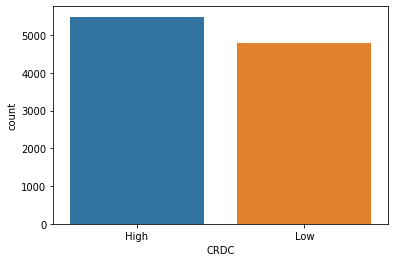

In [7]:
sns.countplot('CRDC', data=data)

In [8]:
data['Target']= data['CRDC'].cat.codes
data = data.drop('CRDC', axis=1)
data.head()

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,Target
0,53.35,1105.13,12.87,1378.93,2812.62,75.64,3.3628,0.7205,0
1,72.25,1026.31,3.42,1028.75,919.92,44.21,3.8679,0.8940,0
2,65.08,722.96,6.23,2017.92,1212.42,17.55,2.3552,0.7661,0
3,60.71,1557.23,11.71,558.22,1716.09,65.79,1.7253,0.7738,0
4,46.19,1304.42,8.58,1280.47,1929.22,37.45,1.8327,0.7611,0


In [9]:
data.corr().style.background_gradient(cmap="Blues")

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,Target
Wellhead Temp. (C),1.000000,-0.006530,-0.010566,0.008170,-0.006123,-0.014964,-0.001089,0.019406,-0.006499
Wellhead Press (psi),-0.006530,1.000000,-0.023430,-0.023765,-0.015909,0.002189,-0.008868,-0.002049,0.346670
MMCFD- gas,-0.010566,-0.023430,1.000000,-0.001589,-0.008429,-0.000596,-0.012253,0.004666,-0.196476
BOPD (barrel of oil produced per day),0.008170,-0.023765,-0.001589,1.000000,0.008626,0.005770,-0.010193,0.004384,0.004394
BWPD (barrel of water produced per day),-0.006123,-0.015909,-0.008429,0.008626,1.000000,-0.004737,0.003480,-0.018078,0.125353
BSW - basic solid and water (%),-0.014964,0.002189,-0.000596,0.005770,-0.004737,1.000000,-0.012326,0.007574,-0.088270
CO2 mol. (%) @ 25 C & 1 Atm.,-0.001089,-0.008868,-0.012253,-0.010193,0.003480,-0.012326,1.000000,-0.023080,0.054192
Gas Grav.,0.019406,-0.002049,0.004666,0.004384,-0.018078,0.007574,-0.023080,1.000000,-0.015844
Target,-0.006499,0.346670,-0.196476,0.004394,0.125353,-0.088270,0.054192,-0.015844,1.000000


In [10]:
y = data.Target.to_numpy()
X = data.drop(['Target'],axis=1).to_numpy()

# Building models using 7:3 Splitting

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [13]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None],
              'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15,100]}

In [14]:
RF = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, 
                          cv = 5, n_jobs = 1, verbose = 0)
RF.fit(X_train, y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15,
                                          100]})

In [15]:
print('Best Parameters : ', RF.best_params_)

Best Parameters :  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}


In [16]:
RF_pred= RF.predict(X_test)

In [17]:
AccuracyRF= accuracy_score(y_test, RF_pred)
print('Accuracy= ', AccuracyRF)

Accuracy=  0.9122409326424871


In [18]:
print(classification_report(y_test, RF_pred, target_names=['high','low']))

              precision    recall  f1-score   support

        high       0.92      0.92      0.92      1656
         low       0.91      0.90      0.91      1432

    accuracy                           0.91      3088
   macro avg       0.91      0.91      0.91      3088
weighted avg       0.91      0.91      0.91      3088



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

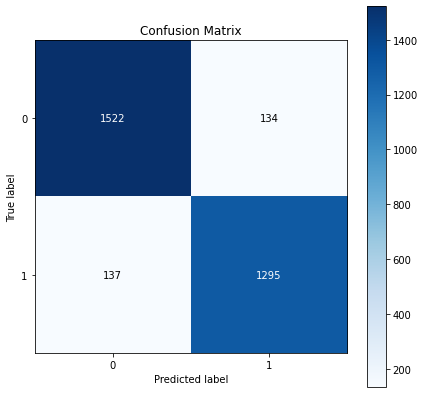

In [19]:
scikitplot.metrics.plot_confusion_matrix(y_test, RF_pred, figsize=(7,7))

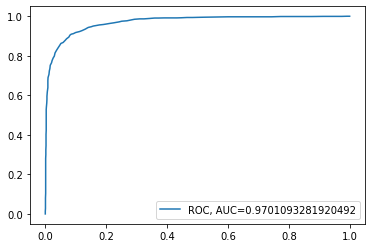

In [20]:
y_pred_proba = RF.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [21]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [22]:
SVM = GridSearchCV(estimator = SVC(probability= True), param_grid = param_grid, 
                          cv = 5, n_jobs = 1, verbose = 0)
SVM.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [23]:
print('Best Parameters : ', SVM.best_params_)

Best Parameters :  {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [24]:
SVM_pred= SVM.predict(X_test)

In [25]:
AccuracySVM= accuracy_score(y_test, SVM_pred)
print('Accuracy= ', AccuracySVM)

Accuracy=  0.9727979274611399


In [26]:
print(classification_report(y_test, SVM_pred, target_names=['high','low']))

              precision    recall  f1-score   support

        high       0.97      0.98      0.97      1656
         low       0.97      0.97      0.97      1432

    accuracy                           0.97      3088
   macro avg       0.97      0.97      0.97      3088
weighted avg       0.97      0.97      0.97      3088



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

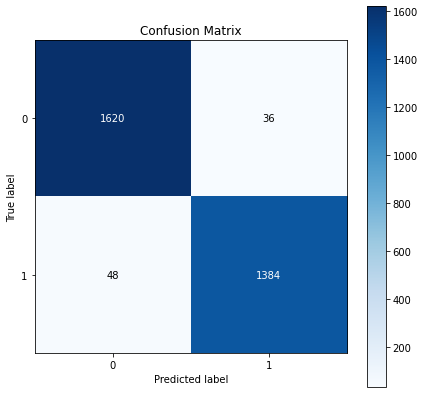

In [27]:
scikitplot.metrics.plot_confusion_matrix(y_test, SVM_pred, figsize=(7,7))

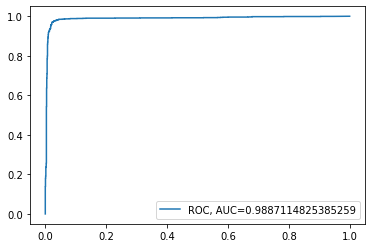

In [28]:
y_pred_proba = SVM.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [29]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [30]:
KNN = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_grid, 
                          cv = 5, n_jobs = 1, verbose = 0)
KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [31]:
print('Best Parameters : ', KNN.best_params_)

Best Parameters :  {'n_neighbors': 21}


In [32]:
KNN_pred= KNN.predict(X_test)

In [33]:
AccuracyKNN= accuracy_score(y_test, KNN_pred)
print('Accuracy= ', AccuracyKNN)

Accuracy=  0.885038860103627


In [34]:
print(classification_report(y_test, KNN_pred, target_names=['high','low']))

              precision    recall  f1-score   support

        high       0.88      0.91      0.89      1656
         low       0.89      0.85      0.87      1432

    accuracy                           0.89      3088
   macro avg       0.89      0.88      0.88      3088
weighted avg       0.89      0.89      0.88      3088



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

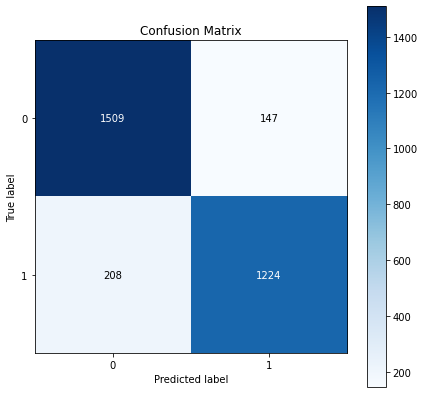

In [35]:
scikitplot.metrics.plot_confusion_matrix(y_test, KNN_pred, figsize=(7,7))

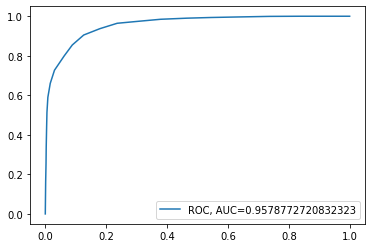

In [36]:
y_pred_proba = KNN.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [37]:
param_grid = {  'max_depth': [5, 10, None],
              'max_features': ['auto', 'log2'], 'n_estimators': [5, 10, 15]}

In [38]:
GB = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = param_grid, 
                          cv = 5, n_jobs = 1, verbose = 0)
GB.fit(X_train, y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/py

/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/py

/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/py

/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/py

/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/py

/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/py

/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/py

/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/py

/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/py

/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/py

/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/py

/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/py

/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/homebrew/lib/py

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=1,
             param_grid={'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15]})

In [39]:
print('Best Parameters : ', GB.best_params_)

Best Parameters :  {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 15}


In [40]:
GB_pred= GB.predict(X_test)

In [41]:
AccuracyGB= accuracy_score(y_test, GB_pred)
print('Accuracy= ', AccuracyGB)

Accuracy=  0.898639896373057


In [42]:
print(classification_report(y_test, GB_pred, target_names=['high','low']))

              precision    recall  f1-score   support

        high       0.90      0.91      0.91      1656
         low       0.89      0.89      0.89      1432

    accuracy                           0.90      3088
   macro avg       0.90      0.90      0.90      3088
weighted avg       0.90      0.90      0.90      3088



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

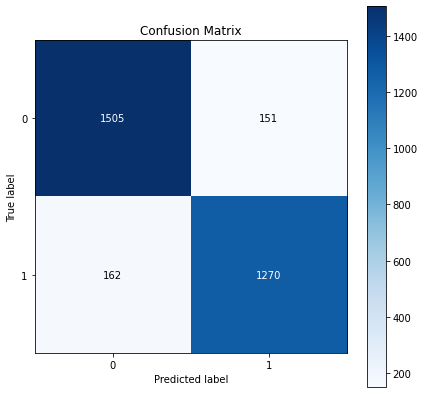

In [43]:
scikitplot.metrics.plot_confusion_matrix(y_test, GB_pred, figsize=(7,7))

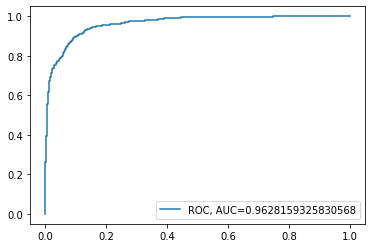

In [44]:
y_pred_proba = GB.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [45]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,10,15,50,150]}

In [46]:
DT = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_grid, 
                          cv = 5, n_jobs = 1, verbose = 0)
DT.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 10, 15, 50, 150]})

In [47]:
print('Best Parameters : ', DT.best_params_)

Best Parameters :  {'criterion': 'entropy', 'max_depth': 50}


In [48]:
DT_pred= DT.predict(X_test)

In [49]:
AccuracyDT= accuracy_score(y_test, DT_pred)
print('Accuracy= ', AccuracyDT)

Accuracy=  0.8387305699481865


In [50]:
print(classification_report(y_test, DT_pred, target_names=['high','low']))

              precision    recall  f1-score   support

        high       0.85      0.84      0.85      1656
         low       0.82      0.83      0.83      1432

    accuracy                           0.84      3088
   macro avg       0.84      0.84      0.84      3088
weighted avg       0.84      0.84      0.84      3088



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

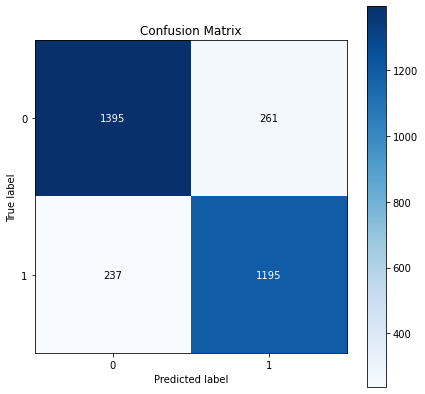

In [51]:
scikitplot.metrics.plot_confusion_matrix(y_test, DT_pred, figsize=(7,7))

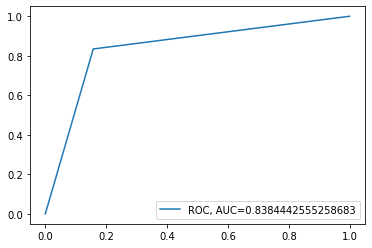

In [52]:
y_pred_proba = DT.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# Ensemble

In [78]:
estimators= [('RF',RandomForestClassifier(bootstrap= True, max_depth= None, max_features= 'auto', n_estimators= 100) ),
             ('SVM',SVC(C= 1000, gamma= 0.1, kernel= 'rbf', probability= True) ),
             ('KNN',KNeighborsClassifier(n_neighbors= 21) ),
             ('GB',GradientBoostingClassifier(max_depth= 10, max_features= 'log2', n_estimators= 15) ),
             ('DT',DecisionTreeClassifier(criterion= 'entropy', max_depth= 150) )]

In [79]:
stacking= StackingClassifier(estimators=estimators, final_estimator=SVC(C= 1000, gamma= 0.1, kernel= 'rbf', probability= True))

In [80]:
stacking.fit(X_train, y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

StackingClassifier(estimators=[('RF',
                                RandomForestClassifier(max_features='auto')),
                               ('SVM',
                                SVC(C=1000, gamma=0.1, probability=True)),
                               ('KNN', KNeighborsClassifier(n_neighbors=21)),
                               ('GB',
                                GradientBoostingClassifier(max_depth=10,
                                                           max_features='log2',
                                                           n_estimators=15)),
                               ('DT',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=150))],
                   final_estimator=SVC(C=1000, gamma=0.1, probability=True))

In [81]:
stacking_pred= stacking.predict(X_test)

In [82]:
print(classification_report(y_test, stacking_pred, target_names=['high','low']))

              precision    recall  f1-score   support

        high       0.97      0.98      0.97      1656
         low       0.97      0.97      0.97      1432

    accuracy                           0.97      3088
   macro avg       0.97      0.97      0.97      3088
weighted avg       0.97      0.97      0.97      3088



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

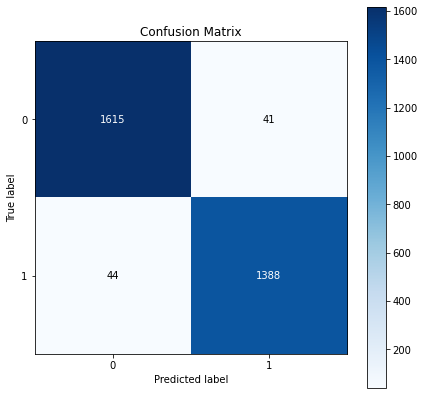

In [83]:
scikitplot.metrics.plot_confusion_matrix(y_test, stacking_pred, figsize=(7,7))

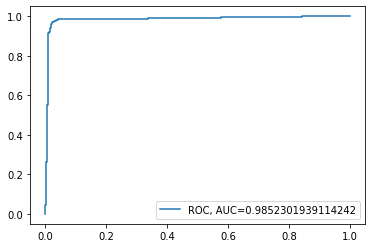

In [84]:
y_pred_proba = stacking.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [85]:
stacking_cv= cross_val_predict(StackingClassifier(estimators=estimators, final_estimator=SVC(C= 1000, gamma= 0.1, kernel= 'rbf', probability= True)), X, y, cv=10)

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

In [86]:
print(classification_report(y, stacking_cv))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5491
           1       0.91      0.91      0.91      4801

    accuracy                           0.92     10292
   macro avg       0.92      0.92      0.92     10292
weighted avg       0.92      0.92      0.92     10292



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

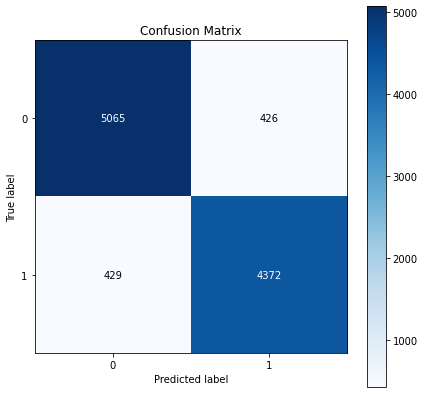

In [87]:
scikitplot.metrics.plot_confusion_matrix(y, stacking_cv, figsize=(7,7))

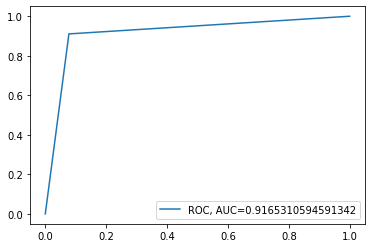

In [88]:
fpr, tpr, _ = roc_curve(y,  stacking_cv)
auc = roc_auc_score(y, stacking_cv)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [89]:
voting= VotingClassifier(estimators=estimators,voting='soft',flatten_transform=True)

In [90]:
voting.fit(X_train, y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(max_features='auto')),
                             ('SVM', SVC(C=1000, gamma=0.1, probability=True)),
                             ('KNN', KNeighborsClassifier(n_neighbors=21)),
                             ('GB',
                              GradientBoostingClassifier(max_depth=10,
                                                         max_features='log2',
                                                         n_estimators=15)),
                             ('DT',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=150))],
                 voting='soft')

In [91]:
voting_pred= voting.predict(X_test)

In [92]:
print(classification_report(y_test, voting_pred, target_names=['high','low']))

              precision    recall  f1-score   support

        high       0.92      0.94      0.93      1656
         low       0.92      0.91      0.92      1432

    accuracy                           0.92      3088
   macro avg       0.92      0.92      0.92      3088
weighted avg       0.92      0.92      0.92      3088



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

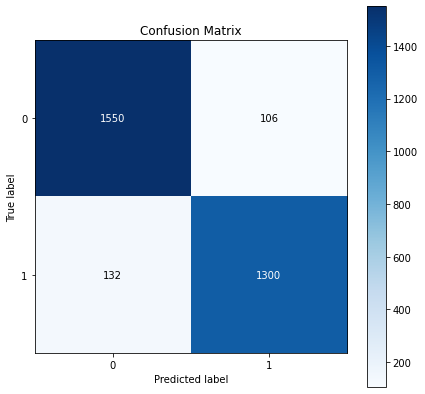

In [93]:
scikitplot.metrics.plot_confusion_matrix(y_test, voting_pred, figsize=(7,7))

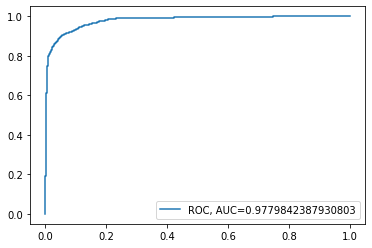

In [94]:
y_pred_proba = voting.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [95]:
voting_cv= cross_val_predict(VotingClassifier(estimators=estimators,voting='soft',flatten_transform=True), X, y, cv=10)

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

In [96]:
print(classification_report(y, voting_cv))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      5491
           1       0.88      0.87      0.88      4801

    accuracy                           0.88     10292
   macro avg       0.88      0.88      0.88     10292
weighted avg       0.88      0.88      0.88     10292



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

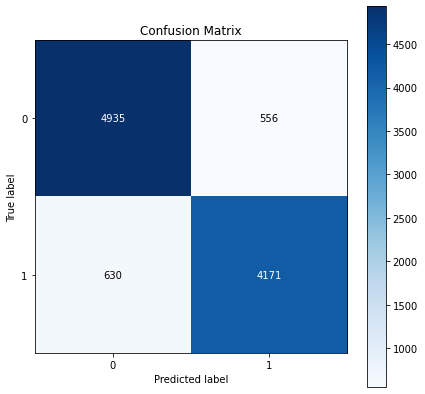

In [97]:
scikitplot.metrics.plot_confusion_matrix(y, voting_cv, figsize=(7,7))

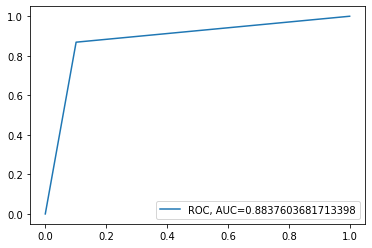

In [98]:
fpr, tpr, _ = roc_curve(y,  voting_cv)
auc = roc_auc_score(y, voting_cv)
plt.plot(fpr,tpr,label="ROC, AUC="+str(auc))
plt.legend(loc=4)
plt.show()